# 测角精度与初轨精度

Text(0, 0.5, '$\\Delta r$, in AU')

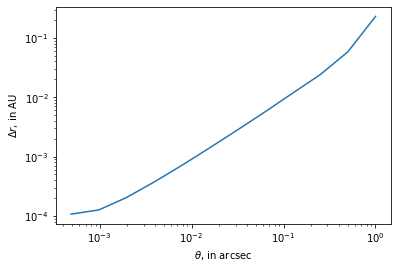

In [3]:
import astrotoys.mechanics as mech
from pymath.common import ptr2xyz,xyz2ptr,direction
reload(mech)
ob0=mech.PlanetOrbit(1.3, 0.3, np.deg2rad(10.), 0., 0.)
obs=mech.PlanetOrbit(0.8, 0.0, np.deg2rad( 0.), 0., 0.)
dt=3600*28.   # time interval between observations, in seconds
accuracy=[]
for n in range(12):
    delta=2.**(n-11) # astrometry accuracy, in arcsec
    T=3.
    M=1000
    dist=np.empty((M,))
    r0=ob0.state_when(0)[0]
    r1=ob0.state_when(dt/86400.)[0]
    r2=ob0.state_when(dt*2/86400.)[0]
    R0=obs.state_when(0)[0]
    R1=obs.state_when(dt/86400.)[0]
    R2=obs.state_when(dt*2/86400.)[0]
    phi0, theta0, _ = xyz2ptr(*(r0-R0))
    phi1, theta1, _ = xyz2ptr(*(r1-R1))
    phi2, theta2, _ = xyz2ptr(*(r2-R2))
    for i in range(M):
        u0  = np.double(ptr2xyz(np.random.normal(phi0, np.deg2rad(delta/3600.)), np.random.normal(theta0, np.deg2rad(delta/3600.)), 1.))
        u1  = np.double(ptr2xyz(np.random.normal(phi1, np.deg2rad(delta/3600.)), np.random.normal(theta1, np.deg2rad(delta/3600.)), 1.))
        u2  = np.double(ptr2xyz(np.random.normal(phi2, np.deg2rad(delta/3600.)), np.random.normal(theta2, np.deg2rad(delta/3600.)), 1.))
        r,v = mech.goid([u0,u1,u2], [0,dt/86400.,dt*2/86400.], [R0,R1,R2], mu=mech.mu_SI['sun']/((mech.AU_to_km*1e3)**3.)*(86400.**2.), d=1.0)
        ob1 = mech.PlanetOrbit(*mech.find_orbit(r,v,mech.mu_SI['sun']/((mech.AU_to_km*1e3)**3.)*(86400**2.)))
        r0, _ = ob0.state_when(T)
        r1, _ = ob1.state_when(T)
        dist[i] = np.sum((r1-r0)**2.)**.5
    accuracy.append(np.mean(dist))
plt.loglog(2.**(np.arange(12)-11), accuracy)
plt.xlabel(r'$\theta$, in arcsec')
plt.ylabel(r'$\Delta r$, in AU')

# 测角间距与初轨精度

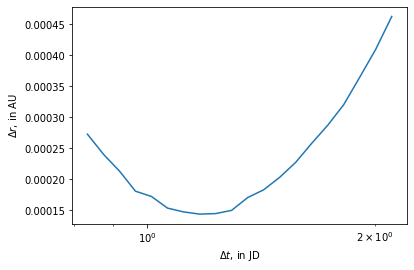

In [8]:
ob0=mech.PlanetOrbit(1.3, 0.3, np.deg2rad(10.), 0., 0.)
obs=mech.PlanetOrbit(0.8, 0.0, np.deg2rad( 0.), 0., 0.)
delta=1e-3 # astrometry accuracy, in arcsec
accuracy=[]
N=20
gamma=1.05
for dt in 3600.*20.*gamma**np.arange(N):
    T=10.*dt/86400.
    M=1000
    dist=np.empty((M,))
    r0=ob0.state_when(0)[0]
    r1=ob0.state_when(dt/86400.)[0]
    r2=ob0.state_when(dt*2/86400.)[0]
    R0=obs.state_when(0)[0]
    R1=obs.state_when(dt/86400.)[0]
    R2=obs.state_when(dt*2/86400.)[0]
    phi0, theta0, _ = xyz2ptr(*(r0-R0))
    phi1, theta1, _ = xyz2ptr(*(r1-R1))
    phi2, theta2, _ = xyz2ptr(*(r2-R2))
    for i in range(M):
        u0 = np.double(ptr2xyz(np.random.normal(phi0, np.deg2rad(delta/3600.)), np.random.normal(theta0, np.deg2rad(delta/3600.)), 1.))
        u1 = np.double(ptr2xyz(np.random.normal(phi1, np.deg2rad(delta/3600.)), np.random.normal(theta1, np.deg2rad(delta/3600.)), 1.))
        u2 = np.double(ptr2xyz(np.random.normal(phi2, np.deg2rad(delta/3600.)), np.random.normal(theta2, np.deg2rad(delta/3600.)), 1.))
        r,v = mech.goid([u0,u1,u2], [0,dt/86400.,dt*2/86400.], [R0,R1,R2], mu=mech.mu_SI['sun']/((mech.AU_to_km*1e3)**3.)*(86400.**2.), d=1.0)
        ob1 = mech.PlanetOrbit(*mech.find_orbit(r,v,mech.mu_SI['sun']/((mech.AU_to_km*1e3)**3.)*(86400**2.)))
        r0, _ = ob0.state_when(T)
        r1, _ = ob1.state_when(T)
        dist[i] = np.sum((r1-r0)**2.)**.5
    accuracy.append(np.mean(dist))
plt.semilogx(3600.*20.*gamma**np.arange(N)/86400., accuracy)
plt.xlabel(r'$\Delta t$, in JD')
plt.ylabel(r'$\Delta r$, in AU')
plt.savefig('dr_vs_tau.png')

# 预报时间与预报精度

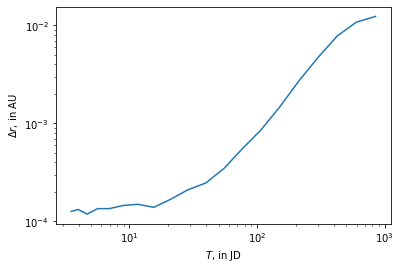

In [11]:
ob0=mech.PlanetOrbit(1.3, 0.3, np.deg2rad(10.), 0., 0.)
obs=mech.PlanetOrbit(0.8, 0.0, np.deg2rad( 0.), 0., 0.)
delta=1e-3 # astrometry accuracy, in arcsec
accuracy=[]
N=20
gamma=1.414
dt=3600.*28
for T in (2.+gamma**np.arange(N))*dt/86400.:
    M=200
    dist=np.empty((M,))
    r0=ob0.state_when(0)[0]
    r1=ob0.state_when(dt/86400.)[0]
    r2=ob0.state_when(dt*2/86400.)[0]
    R0=obs.state_when(0)[0]
    R1=obs.state_when(dt/86400.)[0]
    R2=obs.state_when(dt*2/86400.)[0]
    phi0, theta0, _ = xyz2ptr(*(r0-R0))
    phi1, theta1, _ = xyz2ptr(*(r1-R1))
    phi2, theta2, _ = xyz2ptr(*(r2-R2))
    for i in range(M):
        u0 = np.double(ptr2xyz(np.random.normal(phi0, np.deg2rad(delta/3600.)), np.random.normal(theta0, np.deg2rad(delta/3600.)), 1.))
        u1 = np.double(ptr2xyz(np.random.normal(phi1, np.deg2rad(delta/3600.)), np.random.normal(theta1, np.deg2rad(delta/3600.)), 1.))
        u2 = np.double(ptr2xyz(np.random.normal(phi2, np.deg2rad(delta/3600.)), np.random.normal(theta2, np.deg2rad(delta/3600.)), 1.))
        r,v = mech.goid([u0,u1,u2], [0,dt/86400.,dt*2/86400.], [R0,R1,R2], mu=mech.mu_SI['sun']/((mech.AU_to_km*1e3)**3.)*(86400.**2.), d=1.0)
        ob1 = mech.PlanetOrbit(*mech.find_orbit(r,v,mech.mu_SI['sun']/((mech.AU_to_km*1e3)**3.)*(86400**2.)))
        r0, _ = ob0.state_when(T)
        r1, _ = ob1.state_when(T)
        dist[i] = np.sum((r1-r0)**2.)**.5
    accuracy.append(np.mean(dist))
plt.loglog((2.+gamma**np.arange(N))*dt/86400., accuracy)
plt.xlabel(r'$T$, in JD')
plt.ylabel(r'$\Delta r$, in AU')
plt.savefig('dr_vs_tau.png')